# Logistic Regression

This notebooks aims at showing how classification via logistic regression is done and at visualizing each step

In [1]:
%matplotlib notebook 
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

try:
    import seaborn as sns
except:
    pass

import fancy_plot

# Data

In [2]:
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0), \
        (8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0), \
        (1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),   \
        (6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),\
        (8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),\
        (0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),\
        (0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),\
        (8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0), \
        (1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),\
        (7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),\
        (8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),\
        (4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),\
        (8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),\
        (2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),\
        (8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),\
        (2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),\
        (2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),\
        (7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),\
        (8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),\
        (5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),\
        (4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),\
        (4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),\
        (3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),\
        (8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),\
        (1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),\
        (9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),\
        (7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),\
        (2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),\
        (5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]

data = np.array(data)
data_x = np.hstack((np.ones((data.shape[0], 1)), data[:, :2]))
data_y = data[:, 2, np.newaxis]
print data_x[0:2]
print data_y[0:2]

[[  1.00000000e+00   7.00000000e-01   4.80000000e+04]
 [  1.00000000e+00   1.90000000e+00   4.80000000e+04]]
[[ 1.]
 [ 0.]]


In [3]:
def get_scaled(x):
    x_scaled = x.copy()
    x_scaled[:, 1:] = (x[:, 1:] - x[:, 1:].mean(axis=0)) / x[:, 1:].std(axis=0)
    return x_scaled

get_scaled(data_x)

array([[ 1.        , -1.51324933, -1.20660229],
       [ 1.        , -1.09075068, -1.20660229],
       [ 1.        , -0.87950136, -0.43231205],
       [ 1.        , -0.2809616 , -0.23873949],
       [ 1.        ,  0.35278637,  0.60007494],
       [ 1.        ,  0.52882748,  0.14840563],
       [ 1.        ,  0.88090968,  0.60007494],
       [ 1.        ,  1.09215901,  1.37436518],
       [ 1.        ,  1.30340833,  1.05174424],
       [ 1.        ,  1.7611152 ,  1.05174424],
       [ 1.        , -1.47804111, -1.52922322],
       [ 1.        , -1.1259589 , -0.43231205],
       [ 1.        ,  1.7611152 ,  0.7936475 ],
       [ 1.        ,  0.38799459,  0.60007494],
       [ 1.        , -1.26679178, -1.07755392],
       [ 1.        ,  1.44424122,  1.63246192],
       [ 1.        ,  0.28236993,  0.53555075],
       [ 1.        ,  0.07112061,  0.14840563],
       [ 1.        , -1.40762467, -0.6904088 ],
       [ 1.        ,  0.35278637,  0.01935726],
       [ 1.        , -0.03450406,  0.471

### Visualization

<IPython.core.display.Javascript object>


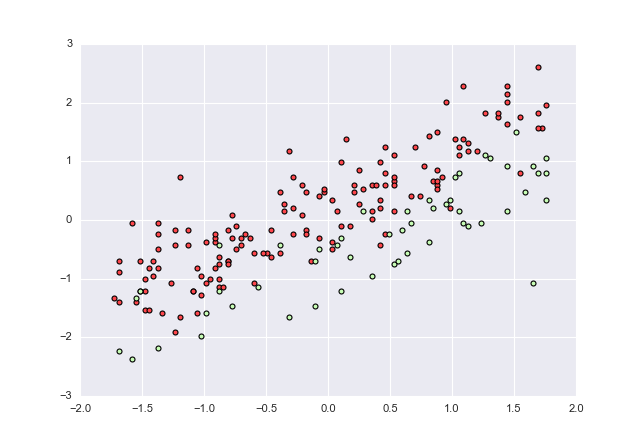

In [4]:
fig = plt.figure()
ax = fig.gca()
sx = get_scaled(data_x)

c0 = (data_y == 0).ravel()
c1 = (data_y == 1).ravel()

ax.scatter(sx[c0, 1], sx[c0, 2], color=fancy_plot.color('light red'), edgecolor="black", linewidth=1)
ax.scatter(sx[c1, 1], sx[c1, 2], color=fancy_plot.color('pale green'), edgecolor="black", linewidth=1)

## Logistic function

Maps any $\mathbb{R}$ value to the segment $[0, 1]$

$$\sigma(x) = \dfrac{1}{1 + e^{-x}}$$

In [5]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

<IPython.core.display.Javascript object>


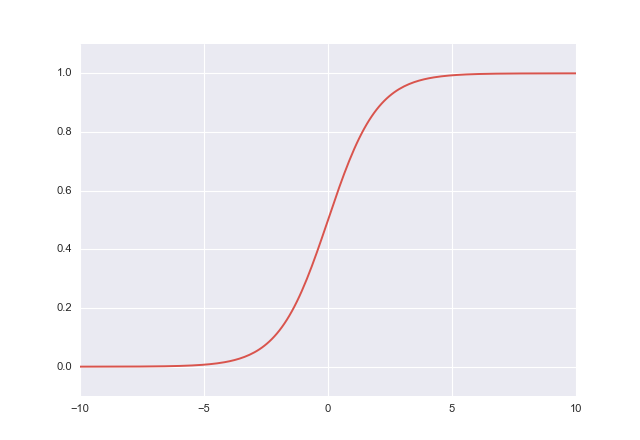

(-0.1, 1.1)

In [6]:
u = np.linspace(-10, 10, 200)

fig = plt.figure()
gca = fig.gca()
plt.plot(u, logistic(u), fancy_plot.color('pale red'))
gca.set_ylim((-0.1, 1.1))

## Log likelihood

$$Y \sim Be(p) \rightarrow f(y) = p^y (1 - p)^{1 - y}$$

$$log(f(x)) = log(p^x (1 - p)^{1 - x}) = log(p^x) + log((1-p)^{1-x}) = x log(p) + (1 - x)log(1 - p)$$

For a given point $(x_i, y_i)$ we have:
    
$$p(y_i | x_i, w) = \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i}$$

$$log(p(y_i | x_i, w)) = y_i log(\sigma(w^Tx_i)) + (1 - y_i) log(1 - \sigma(w^Tx_i))$$

Then, for all points $(x, y)$, we have

$$p(y | x, w) = \prod_i [ \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i} ]$$

$$log(p(y_i | x_i, w)) = \sum_i [ y_i log(\sigma(w^Tx_i)) + (1 - y_i) log(1 - \sigma(w^Tx_i)) ]$$

In [7]:
def safe_log(u):
    return np.log(np.maximum(1e-16, u))

def log_likelihood(x, y, w):
    wx = x.dot(w)
    error = y * safe_log(logistic(wx)) # Class 1
    error += (1 - y) * safe_log(1 - logistic(wx)) # Class 0
    return error.sum()

### Visualization

Given $w_o$ fixed, visualize the value of $L$ (error)

<IPython.core.display.Javascript object>


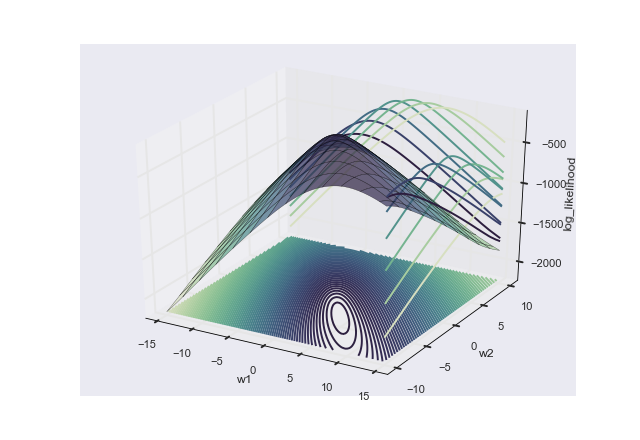

In [8]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact(w0=widgets.FloatSlider(min=-10,max=10,step=0.1,value=1))
def plot_log_likelihood(w0):
    w1_limits = -15, 15
    w2_limits = -10, 10
    w1 = np.linspace(*w1_limits,num=100)
    w2 = np.linspace(*w2_limits,num=100)

    x_scaled = get_scaled(data_x)

    zs = [log_likelihood(x_scaled, data_y, np.asarray((w0, w1_i, w2_i)).reshape((-1, 1))) for w2_i in w2 for w1_i in w1]

    w1, w2 = np.meshgrid(w1, w2)
    Z = np.asarray(zs).reshape(w2.shape)

    cmap = fancy_plot.cubhelix(8, start=.5, rot=-.75, as_cmap=True)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(w1, w2, Z, cstride=8, alpha=0.7, cmap=cmap)
    cset = ax.contour(w1, w2, Z, 100, zdir='z', offset=Z.min(), cmap=cmap)
    cset = ax.contour(w1, w2, Z, zdir='x', offset=w1_limits[1], cmap=cmap)
    cset = ax.contour(w1, w2, Z, zdir='y', offset=w2_limits[1], cmap=cmap)

    ax.set_xlabel('w1')
    ax.set_xlim(w1_limits[0] - 1, w1_limits[1] + 1)
    ax.set_ylabel('w2')
    ax.set_ylim(w2_limits[0] - 1, w2_limits[1] + 1)
    ax.set_zlabel('log_likelihood')

    plt.show()

## Log likehood Gradient

$$\dfrac{\delta L}{\delta w} = y \dfrac{1}{\sigma(w^Tx)} \dfrac{\delta \sigma(w^Tx)}{\delta w} + (1 - y) \dfrac{1}{1 - \sigma(w^Tx)} \dfrac{\delta \sigma(w^Tx)}{\delta w}$$

$$\dfrac{\delta \sigma (w^Tx)}{\delta w} = \sigma(w^Tx) (1 - \sigma(w^Tx)) x^T$$

$$\sigma(w^Tx) = \hat{y}$$

Then:

$$\dfrac{\delta L}{\delta w} = y (1 - \sigma(w^Tx)) x^T + (1 - y) \sigma(w^Tx) x^T = x^T (y - \hat{y})$$

In [9]:
def log_likelihood_gradient(x, y, w):
    yhat = logistic(x.dot(w))
    return x.T.dot(y - yhat)

### Visualization of the gradient

Given $w_0$ fixed, visualize the direction of the gradient ($\nabla L = \dfrac{\delta L}{\delta w}$)

(10000L, 1L)


<IPython.core.display.Javascript object>


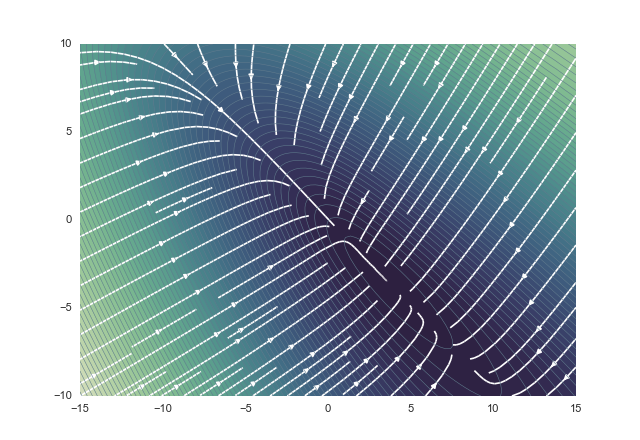

-157.179236464


In [10]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact(w0=widgets.FloatSlider(min=-10,max=10,step=0.1,value=1))
def plot_log_likelihood_gradient(w0):
    
    w1_limits = -15, 15
    w2_limits = -10, 10
    w1 = np.linspace(*w1_limits,num=100)
    w2 = np.linspace(*w2_limits,num=100)

    x_scaled = get_scaled(data_x)

    zs = [log_likelihood(x_scaled, data_y, np.asarray((w0, w1_i, w2_i)).reshape((-1, 1))) for w2_i in w2 for w1_i in w1]
    gs = [log_likelihood_gradient(x_scaled, data_y, np.asarray((w0, w1_i, w2_i)).reshape((-1, 1))) for w2_i in w2 for w1_i in w1]
    
    w1, w2 = np.meshgrid(w1, w2)
    Z = np.asarray(zs).reshape(w2.shape)
    G = np.asanyarray(gs)
    print G[:,1].shape

    cmap = fancy_plot.cubhelix(8, start=.5, rot=-.75, as_cmap=True)
    fig = plt.figure()
    ax = fig.gca()
    cset = ax.contourf(w1, w2, Z, 80, zdir='z', offset=Z.min(), cmap=cmap)
    lines = ax.contour(w1, w2, Z, 80, zdir='z', offset=Z.min())
    ax.streamplot(w1, w2, G[:, 1].reshape(w2.shape), G[:, 2].reshape(w2.shape), 1, color='white', linewidth=1.5)

    for l in lines.collections:
        l.set_linewidth(0.5)
        l.set_color(fancy_plot.color('blue grey'))
        
    plt.show()
    
    print Z.max()

## Gradient descend

In [11]:
neg = lambda f: lambda *args: -f(*args)

def gradient_descend(x, y, f, grad, steps=5000, lr=1, lr_epsilon=1e-6, epsilon=1e-6, fix_w0=None):
    lr_0 = lr
    w_0 = np.random.sample((x.shape[1], 1)) * 10
#     w_0 = np.ones((x.shape[1], 1)) * 10

    if fix_w0 is not None:
        w_0[0, 0] = fix_w0
            
    path = [w_0]
    obj = [f(x, y, w_0)]
    
    s = 0
    alpha = 1
    while s < steps and lr >= lr_epsilon and alpha >= epsilon:
        w_1 = w_0 - lr * grad(x, y, w_0)
        
        if fix_w0 is not None:
            w_1[0, 0] = fix_w0
        
        loss = f(x, y, w_1)
        if loss < obj[-1]:
            alpha = np.linalg.norm(w_0 - w_1)
            lr = lr_0
            w_0 = w_1
            path += [w_0]
            obj += [loss]
            s += 1
        else:
            lr = lr * 0.5
        
    return w_0, np.array(path), np.array(obj)

## Plotting

In [12]:
def plot_gradiend_descend(f, grad, w, path):
    plt.figure()
    plt.plot(obj, lw=2.5)
    plt.show()

    fig = plt.figure()
    ax = fig.gca()

    w0 = w[0,0]
    w1_limits = min(-15, path[:,1].min() - 1), max(15, path[:,1].max() + 1)
    w2_limits = min(-10, path[:,2].min() - 1), max(10, path[:,2].max() + 1)
    w1 = np.linspace(*w1_limits,num=100)
    w2 = np.linspace(*w2_limits,num=100)

    x_scaled = get_scaled(data_x)

    zs = [f(x_scaled, data_y, np.asarray((w0, w1_i, w2_i)).reshape((-1, 1))) for w2_i in w2 for w1_i in w1]
    gs = [grad(x_scaled, data_y, np.asarray((w0, w1_i, w2_i)).reshape((-1, 1))) for w2_i in w2 for w1_i in w1]

    w1, w2 = np.meshgrid(w1, w2)
    Z = np.asarray(zs).reshape(w2.shape)
    G = np.asanyarray(gs)

    ax.plot(path[:, 1], path[:, 2], fancy_plot.color('pale blue'), lw=2.5)
    ax.plot(path[0, 1], path[0, 2], fancy_plot.color('pale red'), marker='o', markersize=10, markeredgecolor='white')
    ax.plot(path[-1, 1], path[-1, 2], fancy_plot.color('frog green'), marker='o', markersize=10, markeredgecolor='white')
    
    cmap = fancy_plot.cubhelix(8, start=.5, rot=-.75, as_cmap=True)
    cset = ax.contourf(w1, w2, Z, 80, zdir='z', cmap=cmap)
    lines = ax.contour(w1, w2, Z, 80, zdir='z', offset=Z.min())
    ax.streamplot(w1, w2, G[:, 1].reshape(w2.shape), G[:, 2].reshape(w2.shape), 1, color='white', linewidth=1.5)
    
    for l in lines.collections:
        l.set_linewidth(0.5)
        l.set_color(fancy_plot.color('almost black'))
        
    plt.show()

## Do some tests

Done optimizing in 80 steps
Found w_o: -1.5000


<IPython.core.display.Javascript object>


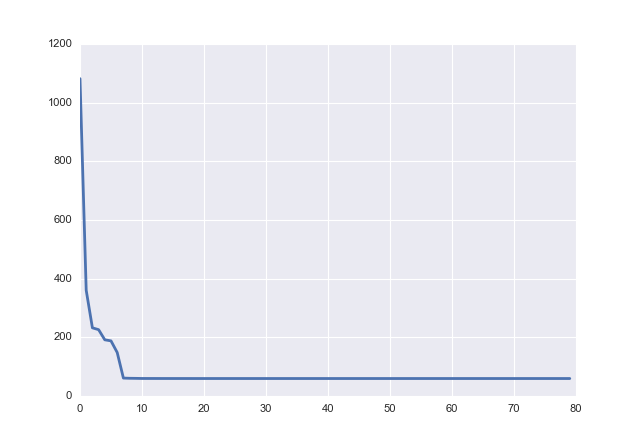

<IPython.core.display.Javascript object>


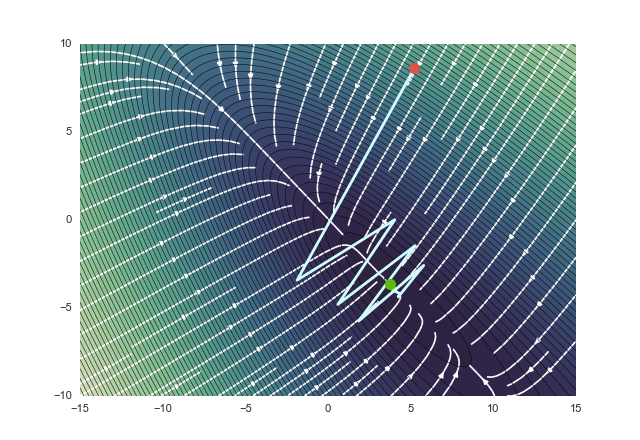

Done optimizing in 99 steps
Found w_o: 1.5000


<IPython.core.display.Javascript object>


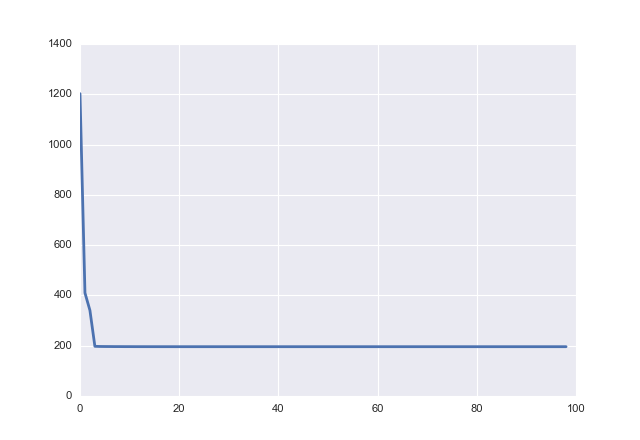

<IPython.core.display.Javascript object>


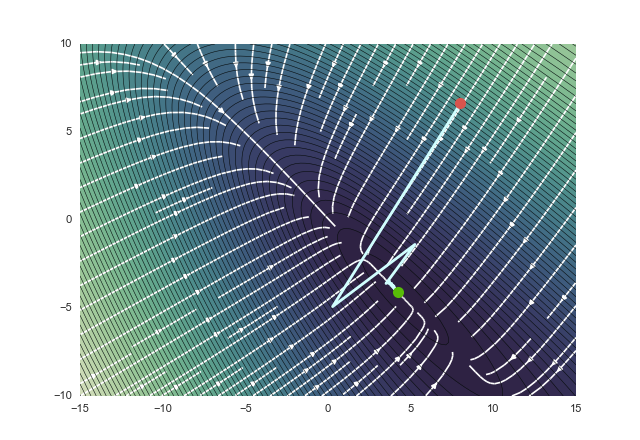

Done optimizing in 220 steps
Found w_o: -2.1144


<IPython.core.display.Javascript object>


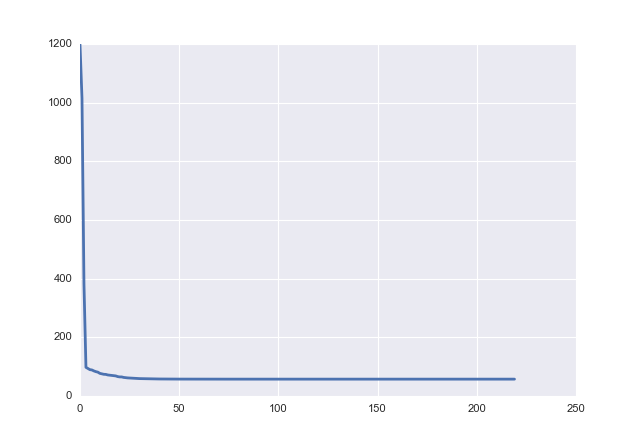

<IPython.core.display.Javascript object>


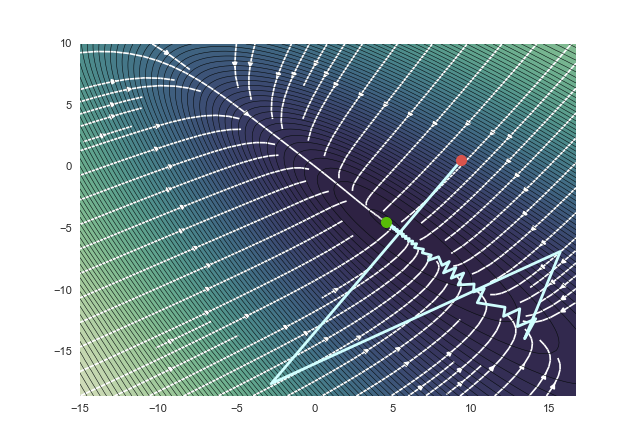

In [13]:
for w0 in [-1.5, 1.5, None]:
    w, path, obj = gradient_descend(get_scaled(data_x), data_y, neg(log_likelihood), neg(log_likelihood_gradient), fix_w0=w0)

    print "Done optimizing in %d steps" % (len(path),)
    print "Found w_o: %.4f" % (path[-1, 0])

    plot_gradiend_descend(log_likelihood, log_likelihood_gradient, w, path)

## Final discrimination

<IPython.core.display.Javascript object>


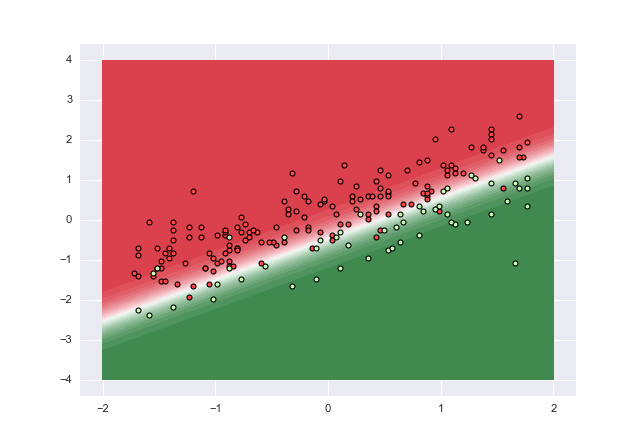

In [14]:
fig = plt.figure()
ax = fig.gca()
sx = get_scaled(data_x)


u = np.linspace(-2, 2)
v = np.linspace(-4, 4)

cmap = sns.diverging_palette(10, 133, sep=10, n=7, as_cmap=True)
probs = np.asarray([logistic(np.asarray((1, xi, yi)).dot(w)) for yi in v for xi in u]).reshape((u.shape[0], v.shape[0]))
contour = ax.contourf(u, v, probs, 25, cmap=cmap, vmin=0, vmax=1)

c0 = (data_y == 0).ravel()
c1 = (data_y == 1).ravel()

ax.scatter(sx[c0, 1], sx[c0, 2], color=fancy_plot.color('light red'), edgecolor="black", linewidth=1)
ax.scatter(sx[c1, 1], sx[c1, 2], color=fancy_plot.color('pale green'), edgecolor="black", linewidth=1)